In [1]:
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.1            # Taxa de aprendizado.
i_nodes = 3                 # Número de neurônios na camada de entrada.
h_nodes = 4                # Número de neurônios na camada oculta.
o_nodes = 1                 # Número de neurônios na camada de saída.

In [2]:
# Inicia aleatoriamente as matrizes de pesos.
Wi_h = np.random.random((h_nodes, i_nodes)) #gera a matriz aleatória de pesos entre a entrada e oculta
Wh_o = np.random.random((o_nodes, h_nodes)) #gera a matriz aleatória de pesos entre a oculta e a saída

bias_ih = np.random.random((h_nodes,1)) #gera bias randomico
bias_ho = np.random.random((o_nodes,1)) #gera bias randomico

print("pesos i->h "+str(Wi_h)+" shape: "+ str(Wi_h.shape))
print("pesos h->o "+str(Wh_o)+" shape: "+ str(Wh_o.shape))
print("bias i->h "+str(bias_ih)+" shape: "+ str(bias_ih.shape))
print("bias h->o "+str(bias_ho)+" shape: "+ str(bias_ho.shape))

pesos i->h [[0.02373107 0.31168857 0.40864798]
 [0.36400596 0.91843827 0.98493586]
 [0.470329   0.43469343 0.84131055]
 [0.97488356 0.51964528 0.93624587]] shape: (4, 3)
pesos h->o [[0.37875718 0.10673891 0.95616755 0.95262712]] shape: (1, 4)
bias i->h [[0.34112046]
 [0.13759697]
 [0.67567288]
 [0.98932773]] shape: (4, 1)
bias h->o [[0.6848449]] shape: (1, 1)


In [3]:
# Carrega os dados de treinamento
# Entrada 
# inputs = np.matrix([[1, 1],
#             [1, 0],
#             [0, 1],
#             [0, 0]])
# # Vetor de resultado desejado.
# expected = np.matrix([[0],
#             [1],
#             [1],
#             [0]])

            # Entrada 
inputs = np.matrix([
            [1, 1, 1],
            [1, 1, 0],
            [1, 0, 1],
            [1, 0, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 0, 1],
            [0, 0, 0]])
# Vetor de resultado desejado.
expected = np.matrix([
            [1],
            [0],
            [0],
            [1],
            [0],
            [1],
            [1],
            [0]])
i_qty = inputs.shape[0]                # Número de padrões.
print(i_qty)
numEpocas = 50000
erros_output_quad = np.zeros(i_qty)
Etm = np.zeros(numEpocas)
print("entrada: "+str(inputs))

8
entrada: [[1 1 1]
 [1 1 0]
 [1 0 1]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 0 1]
 [0 0 0]]


In [4]:
def activation_function(x):
    s=1/(1+np.exp(-x)) #função de ativação sigmoid
    return s
    
def derivate_activation_function(x):
    num_rows, num_cols = x.shape
    ds = np.multiply(x,np.ones((num_rows,1))-x)
    return ds #derivada da função de ativação sigmoid

In [5]:
# ===============================================================
# TREINAMENTO.
# ===============================================================
err=1
for i in range(numEpocas):
    for j in range(i_qty):     
        inputj= inputs[j].transpose()  
        hidden = Wi_h.dot(inputj) # PesosXEntrada     
        hidden = hidden+bias_ih #acrescenta o bias
        hidden = 1/(1+np.exp(-hidden)) #função de ativação
    # Incluindo o bias. Saída da camada escondida é a entrada da camada
        # de saída.
        output = Wh_o.dot(hidden) # PesosXoculta
        output = output+bias_ho #acrescenta o bias
        output = 1/(1+np.exp(-output)) #função de ativação / # Neural network output
        
        erro_output = expected[j] - output   
        d_output = derivate_activation_function(output) #derivada da saida
        d_hidden = derivate_activation_function(hidden) #derivada da oculta
        Wh_o_T = Wh_o.transpose() #oculta transposta
        output_T = output.transpose() #saida transposta
        hidden_T = hidden.transpose()
        
        erros_hidden = np.dot(Wh_o_T,erro_output) #erro da oculta

        # Error backpropagation.   
        # Cálculo do gradiente na camada de saída.
        gradient_ho = np.multiply(erro_output,d_output)*learning_rate
        delta_ho = np.dot(gradient_ho,hidden_T)

        gradient_ih = np.multiply(erros_hidden,d_hidden)*learning_rate
        delta_ih = np.dot(gradient_ih, inputs[j])
        #adjust bias
        bias_ho = bias_ho + gradient_ho
        bias_ih = bias_ih + gradient_ih
        # Atualização dos pesos.
        Wi_h = Wi_h +delta_ih
        Wh_o = Wh_o +delta_ho

        #print("entrada = "+ str(inputj))
        #print("esperado = "+ str(expected[j]))
        #print("saida = "+ str(output))
        #print("erro = "+ str(erro_output))  
    Etm[i] = erro_output
    err = np.mean(np.multiply(erro_output,erro_output))/2
    if err<0.00002:
        print("erro satisfeito")
        break

erro satisfeito


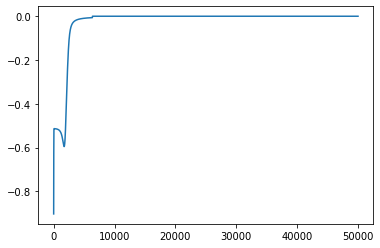

In [6]:

   
# print("Erro Total Médio = " + str(Etm))
plt.plot(Etm)
plt.show()

In [7]:
# ===============================================================
# TESTE DA REDE.
# ===============================================================

test_erro_output = np.zeros(i_qty)

for j in range(i_qty):
    test_inputj= inputs[j].transpose()  
    test_hidden = Wi_h.dot(test_inputj) # PesosXEntrada     
    test_hidden = test_hidden+bias_ih #acrescenta o bias
    test_hidden = 1/(1+np.exp(-test_hidden)) #função de ativação
    # Incluindo o bias. Saída da camada escondida é a entrada da camada
    # de saída.
    test_output = Wh_o.dot(test_hidden) # PesosXoculta
    test_output = test_output+bias_ho #acrescenta o bias
    test_output = 1/(1+np.exp(-test_output)) #função de ativação / # Neural network output
    print("Entrada: "+str(inputs[j]))
    print("Saida: "+str(test_output))
    print("Esperado: "+str(expected[j]))
    test_erro_output = expected[j] - test_output   

Entrada: [[1 1 1]]
Saida: [[0.92458049]]
Esperado: [[1]]
Entrada: [[1 1 0]]
Saida: [[0.06190452]]
Esperado: [[0]]
Entrada: [[1 0 1]]
Saida: [[0.00433968]]
Esperado: [[0]]
Entrada: [[1 0 0]]
Saida: [[0.96043419]]
Esperado: [[1]]
Entrada: [[0 1 1]]
Saida: [[0.06522421]]
Esperado: [[0]]
Entrada: [[0 1 0]]
Saida: [[0.99810298]]
Esperado: [[1]]
Entrada: [[0 0 1]]
Saida: [[0.96212062]]
Esperado: [[1]]
Entrada: [[0 0 0]]
Saida: [[0.00632258]]
Esperado: [[0]]
